## Install project requirements


In [1]:
# !pip install catboost==1.2
# !pip install lightgbm
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install shap
!pip install seaborn
!pip install pandas_profiling

  Using cached lightgbm-4.0.0-py3-none-macosx_10_15_x86_64.macosx_11_6_x86_64.macosx_12_5_x86_64.whl (1.7 MB)
  Using cached numpy-1.25.1-cp310-cp310-macosx_10_9_x86_64.whl (20.1 MB)
  Using cached scipy-1.11.1-cp310-cp310-macosx_10_9_x86_64.whl (37.2 MB)
  Using cached pandas-2.0.3-cp310-cp310-macosx_10_9_x86_64.whl (11.8 MB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached matplotlib-3.7.2-cp310-cp310-macosx_10_12_x86_64.whl (7.4 MB)
  Using cached contourpy-1.1.0-cp310-cp310-macosx_10_9_x86_64.whl (243 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.41.1-cp310-cp310-macosx_10_9_x86_64.whl (2.2 MB)
  Using cached kiwisolver-1.4.4-cp310-cp310-macosx_10_9_x86_64.whl (65 kB)
  Using cached Pillow-10.0.0-cp310-cp310-macosx_10_10_x86_64.whl (3.4 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached sklearn-0.0.post7.tar.gz (3.6 kB)
  Preparing metada

In [12]:
!pip install lightgbm

In [14]:
# import project requirements
import pandas as pd
import numpy as np
import seaborn as sns # this is to load the titanic dataset
import matplotlib as plt # for plots
import shap
# import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load Dataset
Here you can download your dataset with pandas --> data = pd.read_csv("path_to_your_data")

In [3]:
# Load the Titanic dataset from seaborn
data = sns.load_dataset('titanic')

# Display the first few rows of the dataset to get an overview
print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  



####
In this dataset, the binary target is "survived" (in your case: employed/not employed). Each row represents a passenger (in your case: a worker)

## DATA EXPLORATION

In [11]:
# Display general information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [7]:
# Display summary statistics of the numerical features
print(data.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


<function matplotlib.pyplot.show(close=None, block=None)>

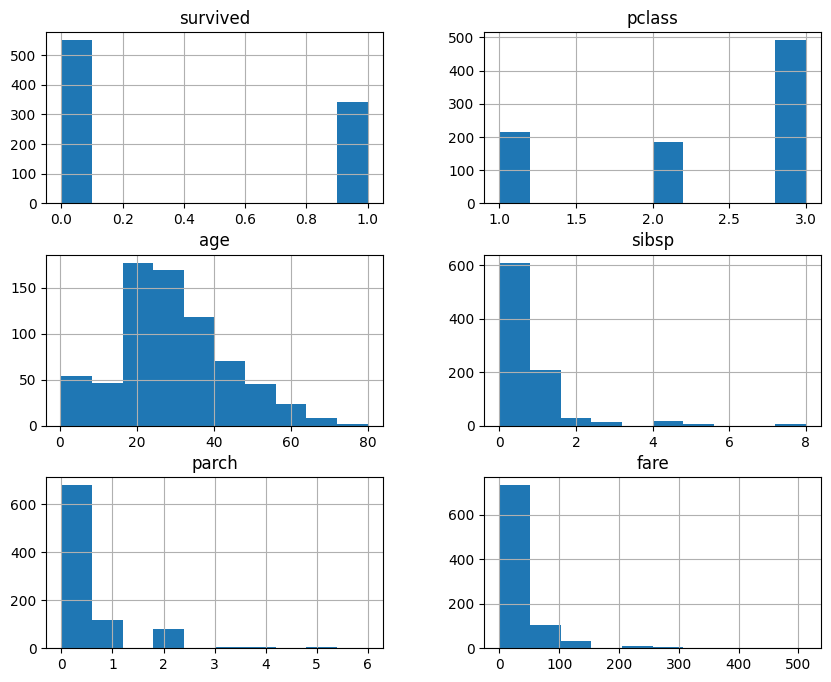

In [15]:
# Plot histograms for numerical features
data.hist(figsize=(10, 8))
plt.pyplot.show

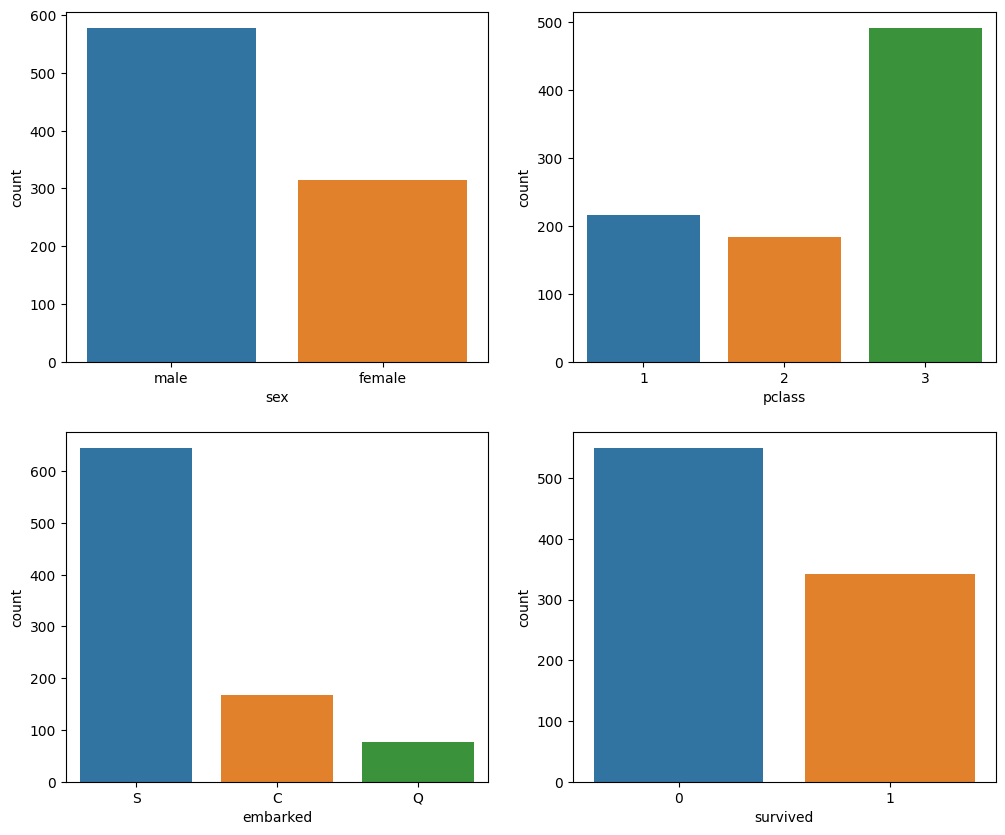

In [14]:
# Plot countplots for categorical features
fig, axes = plt.pyplot.subplots(2, 2, figsize=(12, 10))
sns.countplot(x='sex', data=data, ax=axes[0, 0])
sns.countplot(x='pclass', data=data, ax=axes[0, 1])
sns.countplot(x='embarked', data=data, ax=axes[1, 0])
sns.countplot(x='survived', data=data, ax=axes[1, 1])
plt.pyplot.show()

## MODELLING

source: https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html
a Kaggle example of catboostclassifier usage: https://www.kaggle.com/prashant111/catboost-classifier-in-python

In [15]:
# # Split the data into features (X) and the target variable (y)
# X = data.drop('survived', axis=1)
# y = data['survived']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and train the CatBoost classifier
# model = CatBoostClassifier(iterations=1000,
#                            depth=6,
#                            learning_rate=0.1,
#                            loss_function='Logloss',
#                            verbose=100)


# model.fit(X_train, y_train, cat_features=['pclass',
#                                           'sex'])
# # catboost handles the categorical features. You'd only need to specify them

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Display the classification report and confusion matrix
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

In [16]:
# # Split the data into features (X) and the target variable (y)
# X = data.drop('survived', axis=1)
# y = data['survived']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Convert the data into LightGBM's native format (Dataset)
# train_data = lgb.Dataset(X_train, label=y_train)

# # Set hyperparameters for the model (you can experiment with different parameters)
# params = {
#     'objective': 'binary',
#     'metric': 'binary_logloss',
#     'boosting_type': 'gbdt',
#     'num_leaves': 31,
#     'learning_rate': 0.05,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'verbose': -1
# }

# # Train the model
# num_rounds = 100  # You can adjust the number of boosting rounds
# model = lgb.train(params, train_data, num_rounds)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
# models.append(('XGBClassifier', XGBClassifier()))
# models.append(('SVM', SVC()))

# KFold with 'stratify' option to preserve the percentage of samples for each class.
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for name, model in models:
    score_auc = cross_val_score(model, X, y, cv=cv, scoring = 'roc_auc')
    score_prec = cross_val_score(model, X, y, cv=cv, scoring = 'precision')
    score_recal = cross_val_score(model, X, y, cv=cv, scoring = 'recall')
    score_f1 = cross_val_score(model, X, y, cv=cv, scoring = 'f1')
    print('Model: {} --> score_auc : {} - precision : {} - recall : {} - f1 : {}'.format(name,score_auc.mean(),\
                                                                                        score_prec.mean(),\
                                                                                        score_recal.mean(),\
                                                                                        score_f1.mean()))
    print(100*'-')
    plt.figure(figsize=(10,8))
    plt.title('Reciever Operating Characteristics for {}'.format(name))
    plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % score_auc.mean())
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    X, y = self._validate_data(
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/sklearn/utils/validation.py", line 838, in check_array
    array = array.astype(new_dtype)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/pandas/core/generic.py", line 6324, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/pandas/core/internals/managers.py", line 451, in astype
    return self.apply(
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/pandas/core/internals/blocks.py", line 511, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/pandas/core/dtypes/astype.py", line 242, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/pandas/core/dtypes/astype.py", line 187, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/pandas/core/dtypes/astype.py", line 138, in _astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: 'male'

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    X, y = self._validate_data(
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/sklearn/utils/validation.py", line 838, in check_array
    array = array.astype(new_dtype)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/pandas/core/generic.py", line 6324, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/pandas/core/internals/managers.py", line 451, in astype
    return self.apply(
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/pandas/core/internals/blocks.py", line 511, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/pandas/core/dtypes/astype.py", line 242, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/pandas/core/dtypes/astype.py", line 187, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
  File "/Users/giorgiomondauto/anaconda3/envs/catboost_tree/lib/python3.10/site-packages/pandas/core/dtypes/astype.py", line 138, in _astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: 'female'


In [ ]:
model.fit(X_train, y_train, cat_features=['pclass',
                                          'sex'])
# catboost handles the categorical features. You'd only need to specify them

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

## SHAP -> Feature Importance

In [ ]:
# Assuming you have already trained your CatBoost model, replace 'model' with your actual model object.
explainer = shap.Explainer(model, data.drop(columns=['Survived']))

In [ ]:
# Compute SHAP values for all instances in the dataset
shap_values = explainer.shap_values(titanic_data.drop(columns=['Survived']))

In [ ]:
# Summary plot to show feature importances
shap.summary_plot(shap_values, titanic_data.drop(columns=['Survived']), plot_type='bar')

# Summary plot to show the impact of features on predictions
shap.summary_plot(shap_values, titanic_data.drop(columns=['Survived']))

# Individual instance explanations (e.g., instance 0)
shap.initjs()  # Required for Jupyter notebook
shap.force_plot(explainer.expected_value, shap_values[0, :], titanic_data.drop(columns=['Survived']).iloc[0, :])
